In [5]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# read in data
traffic_data = pd.read_csv("traffic_data.csv")

In [7]:
# look into traffic rates

# https://helper.ipam.ucla.edu/publications/tratut/tratut_12985.pdf

# rush hour rate: 8 percent of the daily traffic
traffic_data['rush_hour_rate'] = traffic_data['Average daily traffic counts Year_2015'] * 0.08


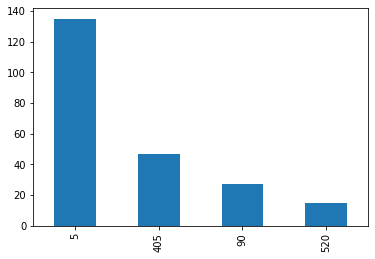

In [14]:
# traffic_data.head()
traffic_data.dtypes

# Convert Route_ID to categorical and plot histogram
traffic_data['Route_ID'] = traffic_data['Route_ID'].astype('category')
traffic_data['Route_ID'].value_counts().plot(kind='bar')


# plt.hist(traffic_data['Comments'])

## Fundamental Quantities of Traffic Flow

### Uniform Traffic Flow

#### Quantities
+ density $\rho$: number of vehicles per unit length (at a fixed time)
+ flow rate (throughput) $f$: number of vehicles passing fixed position per unit time
+ speed (velocity) $u$: distance traveled per unit time
+ time headway $h_t$: time between two vehicles passing fixed position
+ space headway (spacing) $h_s$: road length per vehicle
+ occupancy $b$: percent of time a fixed position is occupied by a vehicle
+ distance between cars $d$, vehicle length $l$

#### Relations
+ $h_s = d + l$
+ $\rho = nlanes/h_s$
+ $f = nlanes/h_t$
+ $f = \rho u$
+ $\rho_max = nlanes/l$
+ $\rho = b * \rho_max$


### Non-Uniform Traffic Flow

#### Quantities
+ density and flow rate same definition as before
+ time mean speed: fixed position, average vehicle speeds over time
+ space mean speed: fixed time, average speeds over a space interval
+ bulk velocity: $u=f/\rho$

#### Uniform traffic estimations
Let's start by throwing in some approximations for values...
+ average length of a car: 15 feet
+ length between cars: 85 feet
+ $h_s$ will be 100 feet at first
+ $\rho = nlanes / h_s$

In [16]:
# Attempting here to estimate the flow capacity of a given stretch of highway
# In theory, if the average rush hour rate is higher than this, traffic will be slowed

u = 60
hs = 176 / 5280


traffic_data['mp_distance'] = traffic_data['endMilepost'] - traffic_data['startMilepost']

traffic_data['rho_decr'] = traffic_data['Number of Lanes DECR MP direction ']  / hs
traffic_data['rho_incr'] = traffic_data['Number of Lanes INCR MP direction'] / hs

traffic_data['flow_uniform_decr'] = traffic_data['rho_decr'] * u 
traffic_data['flow_uniform_incr'] = traffic_data['rho_incr'] * u
traffic_data['flow_uniform_total'] = traffic_data['flow_uniform_decr'] + traffic_data['flow_uniform_incr']

traffic_data.head()


,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,mp_distance,rho_decr,rho_incr,flow_uniform_decr,flow_uniform_incr,flow_uniform_total
0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,0.94,90.0,90.0,5400.0,5400.0,10800.0
1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,1.30,90.0,90.0,5400.0,5400.0,10800.0
2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,0.25,90.0,90.0,5400.0,5400.0,10800.0
3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,1.39,90.0,90.0,5400.0,5400.0,10800.0
4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,0.82,90.0,120.0,5400.0,7200.0,12600.0


In [17]:
'''
for i in range(len(traffic_data)):
    if traffic_data.loc[i, 'rush_hour_rate'] > traffic_data.loc[i, 'flow_uniform_total']:
         print(f'Route: {traffic_data.loc[i, "Route_ID"]}')
'''

'\nfor i in range(len(traffic_data)):\n    if traffic_data.loc[i, \'rush_hour_rate\'] > traffic_data.loc[i, \'flow_uniform_total\']:\n         print(f\'Route: {traffic_data.loc[i, "Route_ID"]}\')\n'

In [36]:
def find_prev_section(traffic_data, index):
    former_sect = -1
    for i in range(len(traffic_data)):
        # starts search from index and decreases
        step = (index - i) % len(traffic_data)
        if traffic_data.loc[index, 'Route_ID'] == traffic_data.loc[step, 'Route_ID']:
            if traffic_data.loc[index, 'startMilepost'] == traffic_data.loc[step, 'endMilepost']:
                former_sect = step
                break
    return former_sect

def find_next_section(traffic_data, index):
    next_sect = -1
    for i in range(len(traffic_data)):
        # starts search from index and increases
        step = (index + i) % len(traffic_data)
        if traffic_data.loc[index, 'Route_ID'] == traffic_data.loc[step, 'Route_ID']:
            if traffic_data.loc[index, 'endMilepost'] == traffic_data.loc[step, 'startMilepost']:
                next_sect = step
                break
    return next_sect

# len(traffic_data)
# find_prev_mp(traffic_data, 122)
# find_next_mp(traffic_data, 122)

In [37]:
# Find previous and next section for each section of highway
for index in range(len(traffic_data)):
    traffic_data.loc[index, 'prev_mp_id'] = find_prev_mp(traffic_data, index)
    traffic_data.loc[index, 'next_mp_id'] = find_next_mp(traffic_data, index)
    

In [38]:
traffic_data.head()

,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,mp_distance,rho_decr,rho_incr,flow_uniform_decr,flow_uniform_incr,flow_uniform_total,prev_mp_id,next_mp_id
0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,0.94,90.0,90.0,5400.0,5400.0,10800.0,-1.0,1.0
1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,1.30,90.0,90.0,5400.0,5400.0,10800.0,0.0,2.0
2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,0.25,90.0,90.0,5400.0,5400.0,10800.0,1.0,3.0
3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,1.39,90.0,90.0,5400.0,5400.0,10800.0,2.0,4.0
4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,0.82,90.0,120.0,5400.0,7200.0,12600.0,3.0,5.0
